In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
data1= pd.read_csv("/content/drive/MyDrive/Product_discontinuation/05_Project2.csv")
data2 = pd.read_csv("/content/drive/MyDrive/Product_discontinuation/02_ProductMaster.csv")

In [ ]:
data2.head()

,ProductKey,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
0,30437,13194,80445,28611,DOM,False
1,68587,13194,80445,28611,DOM,False
2,46645,13194,80445,28611,DOM,False
3,49343,13194,80445,28611,DOM,False
4,64223,13194,80445,28611,DOM,False


In [ ]:
#data= [data1, data2]
data = pd.merge(data1, data2, on='ProductKey', how='left')

In [ ]:
data.head(1)

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
0,89,True,8108,-11,RI,43.99,250.545,248.642,False,78589,67967,32668,DOM,False


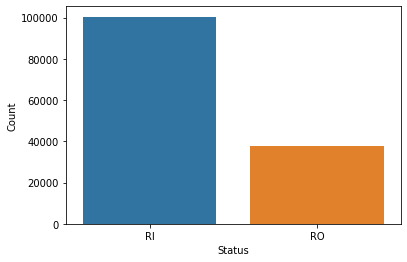

In [ ]:
df= data[data['WeeksOut']==-1]
#print(df.head())


ax = df['Status'].value_counts().reset_index()
fig = sns.barplot( x= 'index', y='Status', data = ax )


fig.set(xlabel = 'Status', ylabel= 'Count')

plt.show()

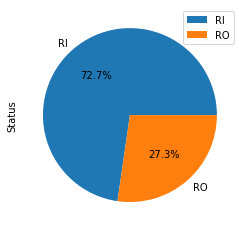

In [ ]:
ax.set_index('index', inplace=True)
ax.plot(kind='pie', x='index' , y='Status',autopct='%1.1f%%',  startangle=0)

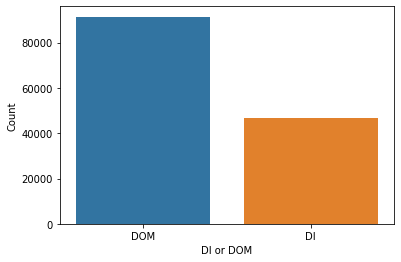

In [ ]:
df1= data[data['WeeksOut']==-1]
#print(df.head())


ax = df1['DIorDOM'].value_counts().reset_index()
ax

fig = sns.barplot( x= 'index', y='DIorDOM', data = ax )

fig.set(xlabel = 'DI or DOM', ylabel= 'Count')

plt.show()

In [ ]:
ax

,index,DIorDOM
0,DOM,91450
1,DI,46597


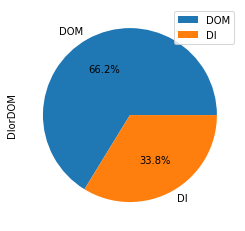

In [ ]:
ax.set_index('index', inplace=True)

ax.plot(kind='pie' , y='DIorDOM',autopct='%1.1f%%',  startangle=0)

In [ ]:
len(data['ProductKey'].unique())

70227

In [ ]:
len(data['CatEdition'].unique())

7

In [ ]:
data['CatEdition'].unique()

array([89, 90, 91, 92, 88, 93, 94])

In [ ]:
len(data)

3625659

In [ ]:
len(data['HierarchyLevel1'].unique())

214

In [ ]:
len(data['HierarchyLevel2'].unique()) 

28

In [ ]:
data.query('ProductKey == 30437 & Supplier == 13194').head()

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
2017305,93,True,30437,-18,RO,6.0,1.277,0.0,True,13194,80445,28611,DOM,False
2017306,93,True,30437,-17,RO,6.0,1.470,0.0,True,13194,80445,28611,DOM,False
2017307,93,True,30437,-16,RO,6.0,1.562,0.0,True,13194,80445,28611,DOM,False
2017308,93,True,30437,-15,RO,6.0,1.666,0.0,True,13194,80445,28611,DOM,False
2017309,93,True,30437,-14,RO,6.0,1.785,0.0,True,13194,80445,28611,DOM,False


In [ ]:
data.query('WeeksOut == -1')

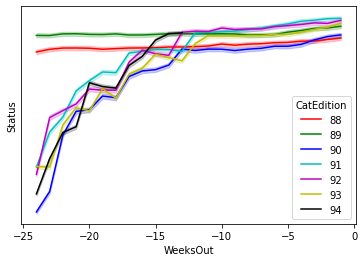

In [ ]:

sns.lineplot(data= data, y= 'Status', x= 'WeeksOut', hue='CatEdition', palette=['r', 'g', 'b', 'c','m','y','k']  )

plt.show()

In [ ]:
sns.lineplot(data= data, y= 'Status', x= 'WeeksOut', hue='ProductKey' )

plt.show()

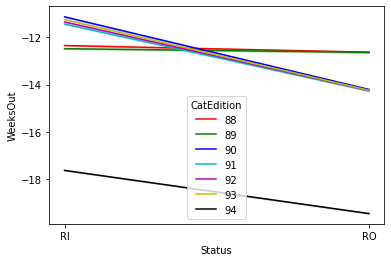

In [ ]:
data.query('ProductKey==5 & WeeksOut ==-6')

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
721907,90,False,5,-6,RI,18.99,12.833,0.000,True
721930,91,True,5,-6,RI,18.99,7.666,5.894,True
721954,92,False,5,-6,RI,18.99,8.166,5.631,False
721978,93,True,5,-6,RI,18.99,6.166,4.315,False


In [ ]:
data.pivot_table(index=['ProductKey','CatEdition'],columns='WeeksOut').head()

ActualsPerWeek                                     \
WeeksOut                         -24   -23     -22    -21   -20     -19   
ProductKey CatEdition                                                     
2          94                   24.0  19.0  18.333  18.00  18.2  19.333   
3          91                   17.0  20.5  20.000  16.50  18.0  18.500   
4          94                   10.0  14.5  18.666  17.25  17.8  19.166   
5          90                    NaN   NaN     NaN    NaN   NaN     NaN   
           91                    NaN   0.0   1.000   1.75   2.4   2.500   

                                                     ... SpringSummer       \
WeeksOut                  -18     -17     -16   -15  ...          -10  -9    
ProductKey CatEdition                                ...                     
2          94          19.571  18.250  16.333  14.7  ...          NaN  NaN   
3          91          20.000  18.875  20.555  21.5  ...          1.0  1.0   
4          94          23.428  33.750  44.333  94.3  ...          NaN  NaN   
5          90             NaN     NaN     NaN   NaN  ...          NaN  NaN   
           91           2.428   2.875   2.666   2.7  ...          1.0  1.0   

                                                               
WeeksOut               -8   -7   -6   -5   -4   -3   -2   -1   
ProductKey CatEdition                                          
2          94          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3          91          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
4          94          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5          90          NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0  
           91          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 120 columns]

In [ ]:
data.pivot_table(index=['ProductKey','CatEdition'],columns='WeeksOut')['DiscontinuedTF']

WeeksOut               -24  -23  -22  -21  -20  -19  -18  -17  -16  -15  ...  \
ProductKey CatEdition                                                    ...   
2          94          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
3          91          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
4          94          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
5          90          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
           91          NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
80528      94          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
80530      90          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
           91          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
80531      90          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
           91          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   

WeeksOut               -10  -9   -8   -7   -6   -5   -4   -3   -2   -1   
ProductKey CatEdition                                                    
2          94          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3          91          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
4          94          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5          90          NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  1.0  
           91          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
80528      94          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
80530      90          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
           91          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
80531      90          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
           91          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[178905 rows x 24 columns]

In [ ]:

data.pivot_table(index=['CatEdition','ProductKey'], columns= 'WeeksOut', values= ['Status','ForecastPerWeek','ActualsPerWeek','DiscontinuedTF'])

ActualsPerWeek                                          \
WeeksOut                         -24    -23      -22     -21    -20      -19   
CatEdition ProductKey                                                          
88         8                    10.0    8.5    8.000    8.25    9.8    9.500   
           9                    64.0   62.0   66.000   71.50   69.2   70.833   
           10                  161.0  142.5  135.666  134.25  130.4  125.000   
           18                    3.0    1.5    1.333    1.50    1.4    3.833   
           19                   68.0   57.5   58.666   61.25   64.2   64.333   
...                              ...    ...      ...     ...    ...      ...   
94         80520                 NaN    NaN    1.666    1.50    2.0    2.500   
           80522                 4.0    5.0    3.666    3.25    2.6    2.166   
           80524                51.0   54.0   64.666   65.25   67.2   68.000   
           80526                15.0   16.5   19.333   17.50   15.2   14.333   
           80528                41.0   36.5   35.000   35.50   36.4   36.833   

                                                         ... ForecastPerWeek  \
WeeksOut                   -18      -17      -16    -15  ...             -10   
CatEdition ProductKey                                    ...                   
88         8            10.000    9.750    9.222    8.8  ...             8.3   
           9            77.571   79.625   84.555   96.0  ...           196.7   
           10          121.142  120.625  118.555  115.5  ...            90.4   
           18            4.000    5.125    5.888    7.0  ...            38.0   
           19           64.142   62.375   61.333   60.9  ...            49.0   
...                        ...      ...      ...    ...  ...             ...   
94         80520         4.000    4.000    3.666    3.3  ...             NaN   
           80522         1.857    1.750    1.666    1.6  ...             NaN   
           80524        68.428   63.250   57.888   54.1  ...             NaN   
           80526        18.714   17.750   15.888   14.5  ...             NaN   
           80528        39.571   38.750   40.888   42.6  ...             NaN   

                                                                          \
WeeksOut                   -9       -8       -7       -6     -5      -4    
CatEdition ProductKey                                                      
88         8             7.000    7.000    7.857    8.666    8.4    8.50   
           9           193.555  205.125  206.857  204.000  203.0  201.00   
           10           91.111   90.875   90.428   92.000   89.0   88.50   
           18           37.555   37.000    3.000    3.000   10.6    7.75   
           19           54.555   58.500   54.571   56.000   77.6  100.75   
...                        ...      ...      ...      ...    ...     ...   
94         80520           NaN      NaN      NaN      NaN    NaN     NaN   
           80522           NaN      NaN      NaN      NaN    NaN     NaN   
           80524           NaN      NaN      NaN      NaN    NaN     NaN   
           80526           NaN      NaN      NaN      NaN    NaN     NaN   
           80528           NaN      NaN      NaN      NaN    NaN     NaN   

                                              
WeeksOut                   -3     -2     -1   
CatEdition ProductKey                         
88         8             8.000    7.0    7.0  
           9           197.666  196.5  196.0  
           10           89.333   83.0   82.0  
           18            3.000    3.0    3.0  
           19          116.333  124.5  127.0  
...                        ...    ...    ...  
94         80520           NaN    NaN    NaN  
           80522           NaN    NaN    NaN  
           80524           NaN    NaN    NaN  
           80526           NaN    NaN    NaN  
           80528           NaN    NaN    NaN  

[178905 rows x 72 columns]

In [ ]:
data.pivot_table(index='CatEdition', columns= 'WeeksOut', values= ['DiscontinuedTF'])

DiscontinuedTF                                                    \
WeeksOut              -24       -23       -22       -21       -20       -19   
CatEdition                                                                    
88               0.382805  0.375704  0.372937  0.372611  0.364734  0.366180   
89               0.344563  0.346033  0.365064  0.365024  0.366658  0.366214   
90               0.388105  0.372303  0.371979  0.372372  0.372709  0.370061   
91               0.302959  0.301359  0.302492  0.304850  0.305096  0.307654   
92               0.308370  0.311276  0.311350  0.311087  0.310636  0.310172   
93               0.316349  0.331427  0.333374  0.334261  0.335055  0.336497   
94               1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

                                                    ...                      \
WeeksOut         -18       -17       -16       -15  ...       -10       -9    
CatEdition                                          ...                       
88          0.364809  0.363223  0.362409  0.362189  ...  0.352543  0.355360   
89          0.364473  0.357669  0.356009  0.352110  ...  0.344031  0.344086   
90          0.372950  0.372093  0.370697  0.371927  ...  0.365790  0.365366   
91          0.306722  0.306589  0.304840  0.303921  ...  0.300092  0.298129   
92          0.309253  0.306549  0.303998  0.305680  ...  0.300581  0.300758   
93          0.368261  0.367714  0.364324  0.365754  ...  0.338188  0.337444   
94          1.000000  1.000000  1.000000  1.000000  ...       NaN       NaN   

                                                                        \
WeeksOut         -8        -7        -6        -5        -4        -3    
CatEdition                                                               
88          0.352503  0.351548  0.349296  0.348013  0.347992  0.347609   
89          0.346572  0.345451  0.344189  0.336326  0.330681  0.325272   
90          0.364560  0.366382  0.364491  0.364934  0.365957  0.364439   
91          0.297056  0.297479  0.296956  0.293782  0.287977  0.285950   
92          0.299319  0.298209  0.294661  0.292628  0.291648  0.290129   
93          0.338429  0.339363  0.339310  0.336726  0.328038  0.320923   
94               NaN       NaN       NaN       NaN       NaN       NaN   

                                
WeeksOut         -2        -1   
CatEdition                      
88          0.343669  0.337543  
89          0.323641  0.323305  
90          0.362718  0.361724  
91          0.284296  0.283283  
92          0.288962  0.287807  
93          0.319351  0.317944  
94               NaN       NaN  

[7 rows x 24 columns]

In [ ]:
data.count()

CatEdition         3625659
SpringSummer       3625659
ProductKey         3625659
WeeksOut           3625659
Status             3625659
SalePriceIncVAT    3625659
ForecastPerWeek    3625659
ActualsPerWeek     3625659
DiscontinuedTF     3625659
dtype: int64

In [ ]:
data.isna().sum()

CatEdition         0
SpringSummer       0
ProductKey         0
WeeksOut           0
Status             0
SalePriceIncVAT    0
ForecastPerWeek    0
ActualsPerWeek     0
DiscontinuedTF     0
dtype: int64

In [ ]:

data.describe()

,CatEdition,ProductKey,WeeksOut,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek
count,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06,3.625659e+06
mean,9.086631e+01,4.024302e+04,-1.297215e+01,7.816104e+01,1.316644e+02,1.090412e+02
std,1.932145e+00,2.325619e+04,6.879073e+00,1.546267e+02,3.917360e+02,2.596290e+02
min,8.800000e+01,2.000000e+00,-2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.900000e+01,2.002500e+04,-1.900000e+01,1.599000e+01,1.514200e+01,1.055500e+01
50%,9.100000e+01,4.028500e+04,-1.300000e+01,2.999000e+01,4.660000e+01,3.866600e+01
75%,9.300000e+01,6.039400e+04,-7.000000e+00,6.999000e+01,1.270600e+02,1.108330e+02
max,9.400000e+01,8.053100e+04,-1.000000e+00,5.000000e+03,1.637575e+05,4.362633e+04


In [ ]:
data[data['ForecastPerWeek']==131]

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
2326,91,True,73810,-10,RI,129.99,131.0,99.733,False
3485,90,False,70668,-15,RI,29.99,131.0,190.600,False
3497,90,False,70668,-3,RI,29.99,131.0,151.136,False
4648,90,False,10123,-10,RI,39.99,131.0,106.200,False
28363,93,True,51229,-1,RO,35.00,131.0,138.125,True
...,...,...,...,...,...,...,...,...,...
3615729,91,True,22854,-16,RI,52.00,131.0,32.666,False
3615991,91,True,57035,-11,RI,44.99,131.0,74.000,False
3617811,89,True,1109,-2,RI,29.99,131.0,159.043,False
3620782,91,True,38972,-1,RI,114.99,131.0,100.041,False


In [ ]:
data.shape

(3625659, 9)

In [ ]:
data[data.duplicated()== True]

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF


In [ ]:
d1= data[ data['WeeksOut']==-1]['DiscontinuedTF']
d1

10         False
34         False
58         False
82          True
106        False
           ...  
3625537    False
3625561    False
3625585    False
3625609    False
3625645     True
Name: DiscontinuedTF, Length: 138047, dtype: bool

In [ ]:
df= d1.value_counts().rename_axis('Discontinued').reset_index(name='count')
df['count_in_percentage']= (df['count']/df['count'].sum()) *100
df['count_in_percentage']
df

,Discontinued,count,count_in_percentage
0,False,94078,68.149254
1,True,43969,31.850746


In [ ]:
d2= data[ data['WeeksOut']==-1]
d2=d2[['HierarchyLevel1','DiscontinuedTF']]
d2=d2['HierarchyLevel1'].value_counts().rename_axis('Discontinued').reset_index(name='count')
d2

#plt.figure(figsize=(5,5))
#sns.barplot(x='HierarchyLevel1')

,Discontinued,count
0,67967,7069
1,43470,4743
2,32994,4719
3,29873,4537
4,46569,3473
...,...,...
184,77987,3
185,13204,1
186,61709,1
187,75219,1


In [ ]:
d2= data[ data['WeeksOut']==-1]['HierarchyLevel1']

d3=d2.value_counts().rename_axis('HierarchyLevel1').reset_index(name='count')
d3

,HierarchyLevel1,count
0,67967,7069
1,43470,4743
2,32994,4719
3,29873,4537
4,46569,3473
...,...,...
184,77987,3
185,13204,1
186,61709,1
187,75219,1


In [ ]:
#plt.figure(figsize=(15,15))
#sns.barplot(x='HierarchyLevel1', y= 'count', data= dh2 )
#plt.show()

In [ ]:
dh= data.query('WeeksOut==-1 & DiscontinuedTF == False')
dh1=dh['HierarchyLevel1']
dh2= dh1.value_counts().rename_axis('HierarchyLevel1').reset_index(name='Count_False')
#dh2=dh2.iloc[:10]
#dh2.head()

dh= data.query('WeeksOut==-1 & DiscontinuedTF == True')
dh3=dh['HierarchyLevel1']
dh3= dh3.value_counts().rename_axis('HierarchyLevel1').reset_index(name='Count_True')
#dh3.head()


dh_merge = pd.merge(dh2,dh3, on='HierarchyLevel1', how='inner')

dh_merge['Count_False(%)']= (dh_merge['Count_False']/(dh_merge['Count_False']+dh_merge['Count_True'])) *100
dh_merge['Count_True(%)']= (dh_merge['Count_True']/(dh_merge['Count_False']+dh_merge['Count_True'])) *100
dh_merge=dh_merge.iloc[:10]
dh_merge


,HierarchyLevel1,Count_False,Count_True,Count_False(%),Count_True(%)
0,67967,5041,2028,71.311359,28.688641
1,43470,3317,1426,69.934641,30.065359
2,32994,3005,1714,63.678745,36.321255
3,46569,2630,843,75.727037,24.272963
4,29873,2546,1991,56.116376,43.883624
5,75452,2311,742,75.696037,24.303963
6,152,2254,840,72.850679,27.149321
7,70108,2099,1204,63.548289,36.451711
8,30922,1924,777,71.232877,28.767123
9,10159,1912,614,75.692795,24.307205


In [ ]:
dh= data.query('WeeksOut==-1 & DiscontinuedTF == False')
dh1=dh['HierarchyLevel2']
dh2= dh1.value_counts().rename_axis('HierarchyLevel2').reset_index(name='Count_False')
#dh2=dh2.iloc[:10]

dh= data.query('WeeksOut==-1 & DiscontinuedTF == True')
dh3=dh['HierarchyLevel2']
dh3= dh3.value_counts().rename_axis('HierarchyLevel2').reset_index(name='Count_True')

dh_merge = pd.merge(dh2,dh3, on='HierarchyLevel2', how='inner')

dh_merge['Count_False(%)']= (dh_merge['Count_False']/(dh_merge['Count_False']+dh_merge['Count_True'])) *100
dh_merge['Count_True(%)']= (dh_merge['Count_True']/(dh_merge['Count_False']+dh_merge['Count_True'])) *100

dh_merge.sort_values('Count_False',ascending= True).head(5)  


,HierarchyLevel2,Count_False,Count_True,Count_False(%),Count_True(%)
25,53044,411,1110,27.021696,72.978304
24,67054,517,830,38.381589,61.618411
23,15333,522,1379,27.459232,72.540768
22,47024,808,926,46.597463,53.402537
21,60761,828,1231,40.213696,59.786304


In [ ]:
dh_merge['HierarchyLevel1']

0    67967
1    43470
2    32994
3    46569
4    29873
5    75452
6      152
7    70108
8    30922
9    10159
Name: HierarchyLevel1, dtype: int64

In [ ]:
dh_merge['HierarchyLevel1'].to_list()

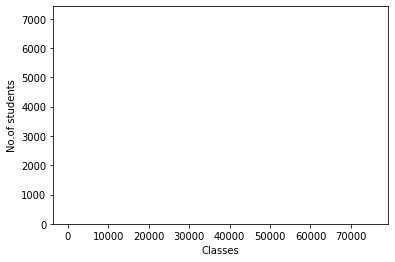

In [ ]:
labels = dh_merge['HierarchyLevel1'].to_list()
Falsed= dh_merge['count_False'].to_list()
Trued= dh_merge['count_True'].to_list()
width = 0.6    # the width of the bars: can also be len(x) sequence




plt.bar(labels, Falsed, width)
plt.bar(labels, Trued, width, bottom= Falsed)


plt.xlabel("Classes")
plt.ylabel("No.of students")

plt.show()

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x='HierarchyLevel1', y= 'count', data= dh2 )
plt.show()

In [ ]:
df= data['DiscontinuedTF'].value_counts().rename_axis('Discontinued').reset_index(name='count')

df

,Discontinued,count
0,False,2186167
1,True,1439492


In [ ]:
data.head()

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,89,True,8108,-11,RI,43.99,250.545,248.642,False
1,89,True,8108,-10,RI,43.99,255.700,244.333,False
2,89,True,8108,-9,RI,43.99,206.111,252.187,False
3,89,True,8108,-8,RI,43.99,188.625,254.764,False
4,89,True,8108,-7,RI,43.99,169.142,249.000,False


In [ ]:
#d1=data
#d1=data.query('CatEdition == 89').head(5)
#sns.lineplot(data= d1, x= 'DiscontinuedTF', y= 'WeeksOut' )
#plt.show()

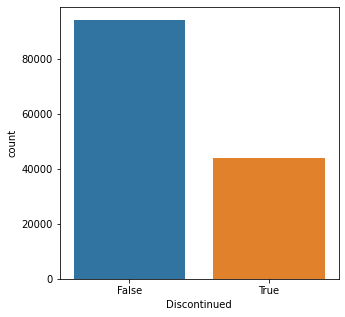

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='Discontinued',y='count', data= df)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()


In [ ]:
data.columns

Index(['CatEdition', 'SpringSummer', 'ProductKey', 'WeeksOut', 'Status',
       'SalePriceIncVAT', 'ForecastPerWeek', 'ActualsPerWeek',
       'DiscontinuedTF', 'Supplier', 'HierarchyLevel1', 'HierarchyLevel2',
       'DIorDOM', 'Seasonal'],
      dtype='object')

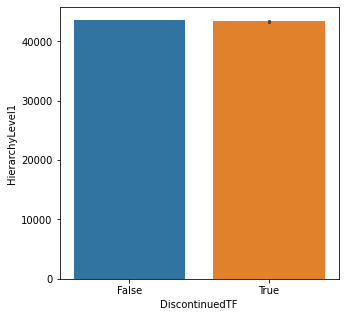

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot( x='DiscontinuedTF', y= 'HierarchyLevel1', data= data)
plt.show()

In [ ]:
data.head(3)

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,89,True,8108,-11,RI,43.99,250.545,248.642,False
1,89,True,8108,-10,RI,43.99,255.700,244.333,False
2,89,True,8108,-9,RI,43.99,206.111,252.187,False


In [ ]:
data[data['DiscontinuedTF']== True]

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
59,92,False,8108,-24,RO,23.99,8.041,4.000,True,78589,67967,32668,DOM,False
60,92,False,8108,-23,RO,23.99,7.913,6.000,True,78589,67967,32668,DOM,False
61,92,False,8108,-22,RO,23.99,7.545,6.333,True,78589,67967,32668,DOM,False
62,92,False,8108,-21,RO,23.99,7.571,6.000,True,78589,67967,32668,DOM,False
63,92,False,8108,-20,RO,23.99,7.050,5.000,True,78589,67967,32668,DOM,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625641,89,True,45386,-5,RO,29.99,101.400,396.000,True,17838,32994,3986,DI,False
3625642,89,True,45386,-4,RO,29.99,74.000,390.190,True,17838,32994,3986,DI,False
3625643,89,True,45386,-3,RO,29.99,301.333,376.909,True,17838,32994,3986,DI,False
3625644,89,True,45386,-2,RO,29.99,290.000,364.304,True,17838,32994,3986,DI,False


In [ ]:
data[data['DiscontinuedTF']== False]

Label encoding

In [ ]:
Le = LabelEncoder()
col1 = ['SpringSummer','DiscontinuedTF', 'Status']
for i in col1:

  data[i] = Le.fit_transform(data[i])

In [ ]:
data.head(5)

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
0,89,1,8108,-11,0,43.99,250.545,248.642,0,78589,67967,32668,DOM,False
1,89,1,8108,-10,0,43.99,255.700,244.333,0,78589,67967,32668,DOM,False
2,89,1,8108,-9,0,43.99,206.111,252.187,0,78589,67967,32668,DOM,False
3,89,1,8108,-8,0,43.99,188.625,254.764,0,78589,67967,32668,DOM,False
4,89,1,8108,-7,0,43.99,169.142,249.000,0,78589,67967,32668,DOM,False


In [ ]:

data = data.query('WeeksOut ==-1')
data.head()

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
10,89,True,8108,-1,RI,43.99,83.0,234.291,False,78589,67967,32668,DOM,False
34,90,False,8108,-1,RI,32.99,28.0,33.625,False,78589,67967,32668,DOM,False
58,91,True,8108,-1,RI,23.99,16.0,29.458,False,78589,67967,32668,DOM,False
82,92,False,8108,-1,RO,23.99,6.0,3.125,True,78589,67967,32668,DOM,False
106,89,True,71280,-1,RI,44.99,25.0,176.041,False,65093,10159,57189,DI,False


In [ ]:
discontinued_counts = data[['HierarchyLevel1', 'DiscontinuedTF']].value_counts().reset_index().rename(columns={0:'counts'})
discontinued_counts_wide = pd.pivot(discontinued_counts,index='HierarchyLevel1',columns='DiscontinuedTF')
discontinued_counts_wide.fillna(0,inplace=True)


In [ ]:
discontinued_counts_wide.head()

counts       
DiscontinuedTF    False   True
HierarchyLevel1               
124               152.0   80.0
152              2254.0  840.0
467                 0.0  437.0
1566             1318.0  206.0
1957              460.0  147.0

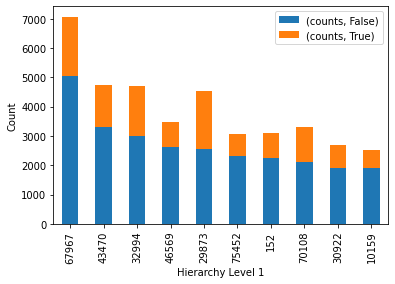

In [ ]:
ax = discontinued_counts_wide.sort_values(('counts', False),ascending=False).head(10).plot(kind='bar',stacked=True)
ax.set_xlabel("Hierarchy Level 1")
ax.set_ylabel("Count")
plt.legend()
plt.show()

In [ ]:
discontinued_count = data[['HierarchyLevel2', 'DiscontinuedTF']].value_counts().reset_index().rename(columns={0:'counts'})
discontinued_counts_wided = pd.pivot(discontinued_count,index='HierarchyLevel2',columns='DiscontinuedTF')
discontinued_counts_wided.fillna(0,inplace=True)

In [ ]:
discontinued_count.head()

,HierarchyLevel2,DiscontinuedTF,counts
0,9740,False,13306
1,71089,False,10794
2,3163,False,10120
3,27781,False,8661
4,6840,False,5198


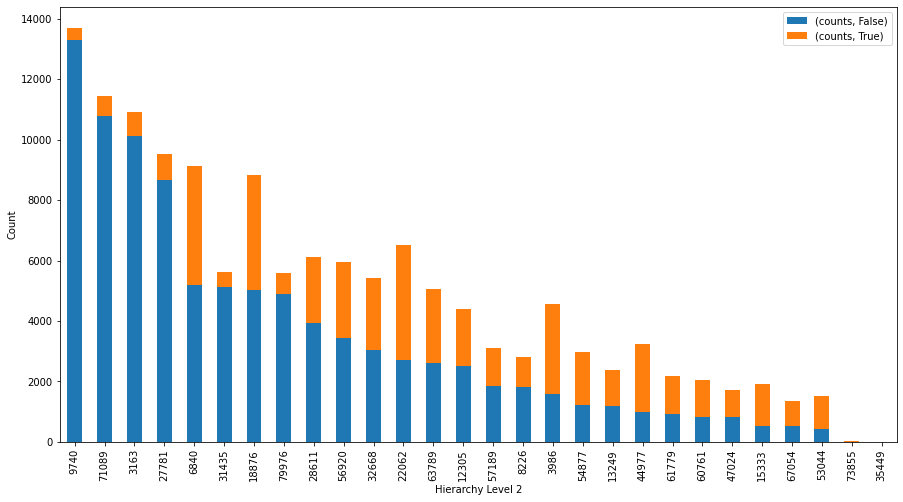

In [ ]:
ax = discontinued_counts_wided.sort_values(('counts', False),ascending=False).plot(kind='bar',stacked=True, figsize=(15,8))
ax.set_xlabel("Hierarchy Level 2")
ax.set_ylabel("Count")
plt.legend()
plt.show()

In [ ]:
discontinued_count.query('HierarchyLevel2==35449')

,HierarchyLevel2,DiscontinuedTF,counts
53,35449,True,3


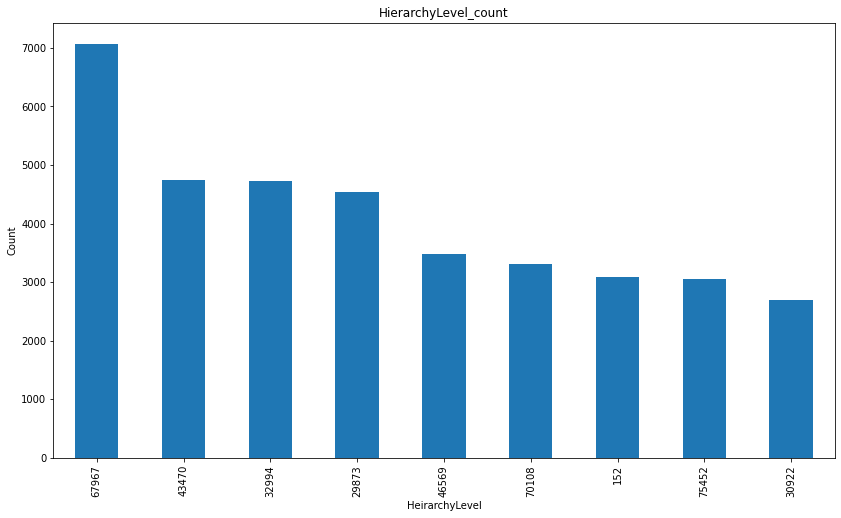

In [ ]:
ax = data['HierarchyLevel1','DiscontinuedTF'].value_counts().iloc[:9].plot(kind='bar', stacked = True,
                                    figsize=(14,8),
                                    title="HierarchyLevel_count" )
ax.set_xlabel("HeirarchyLevel")
ax.set_ylabel("Count")
plt.show()

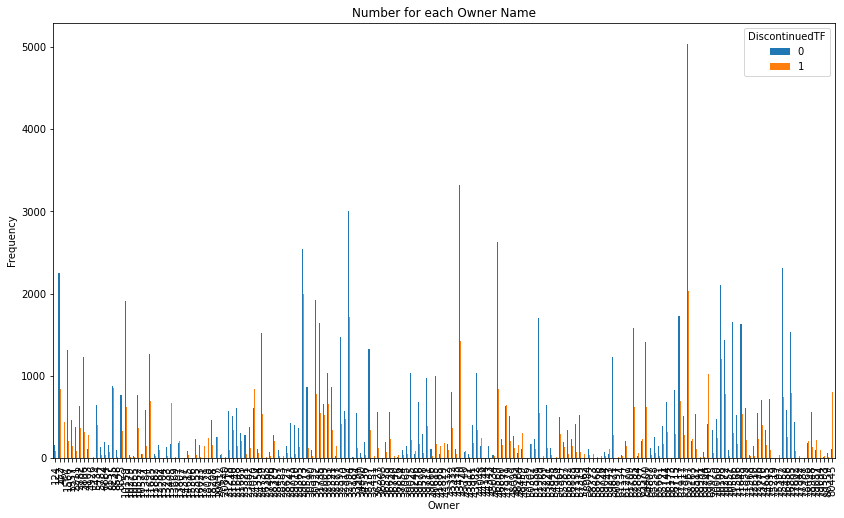

In [ ]:
sns.barplot()


In [ ]:
df= data.groupby(['DiscontinuedTF','HierarchyLevel1'])
df

Here, False = 0 and True =  1 

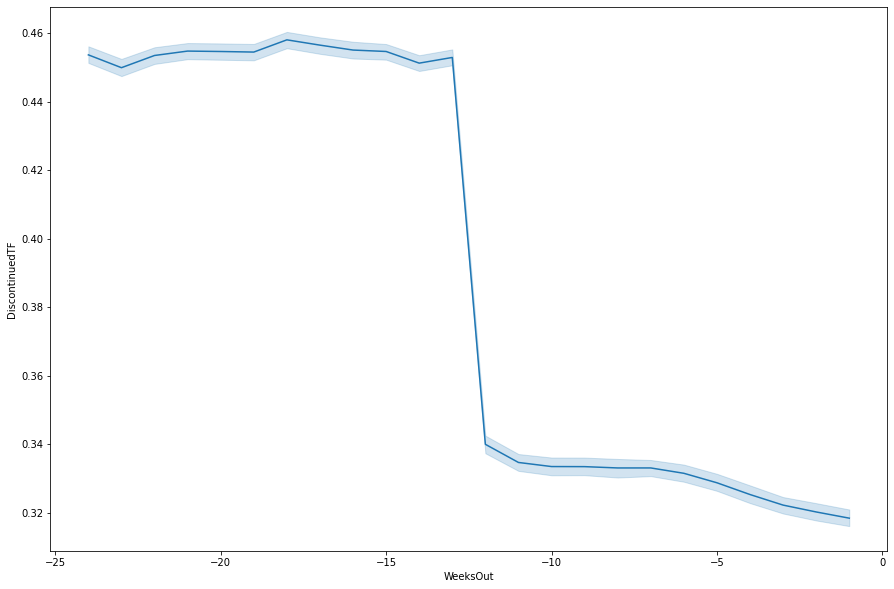

In [ ]:
d1=data
plt.figure(figsize=(15,10))
#d1=data.query('CatEdition == 89')
sns.lineplot(data= d1, y= 'DiscontinuedTF', x= 'WeeksOut' )
plt.show()

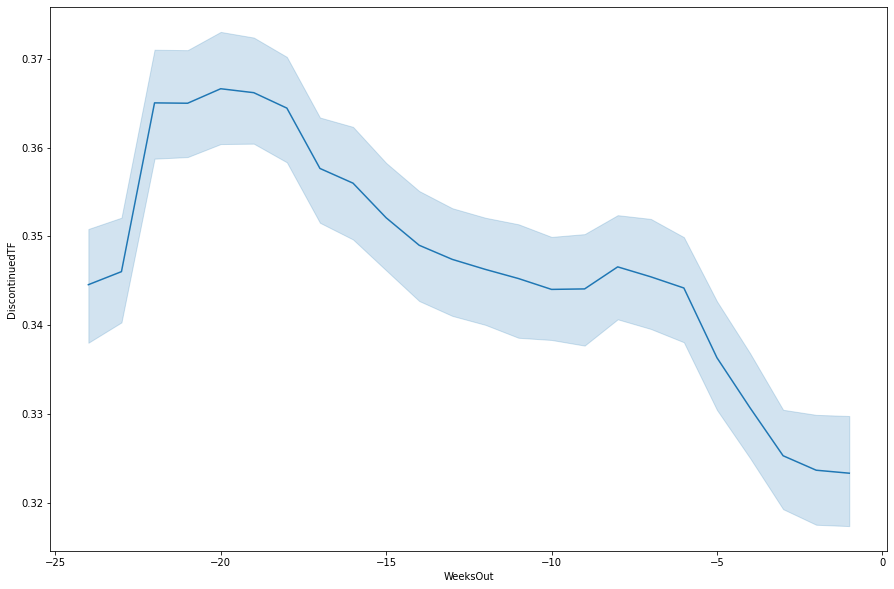

In [ ]:
d1=data
plt.figure(figsize=(15,10))
d1=data.query('CatEdition == 89')
sns.lineplot(data= d1, y= 'DiscontinuedTF', x= 'WeeksOut' )
plt.show()

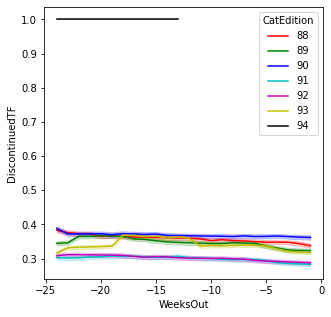

In [ ]:
d1=data
plt.figure(figsize=(5,5))
#d1=data.query('CatEdition == 89')
sns.lineplot(data= data, y= 'DiscontinuedTF', x= 'WeeksOut', hue='CatEdition', palette=['r', 'g', 'b', 'c','m','y','k'] )
plt.show()

In [ ]:
data.query('CatEdition == 94 & DiscontinuedTF == 1').head(2)

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
599,94,False,54639,-24,RO,34.95,79.625,96.0,True,71542,43332,3163,DOM,False
600,94,False,54639,-23,RO,34.95,89.608,100.0,True,71542,43332,3163,DOM,False


In [ ]:
data.query('CatEdition == 89 & WeeksOut == -24 & DiscontinuedTF == 0')

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
83,89,1,71280,-24,0,44.99,5.875,12.0,0
215,89,1,57069,-24,0,73.99,90.333,54.0,0
383,89,1,10637,-24,0,19.99,235.208,38.0,0
479,89,1,54639,-24,0,49.95,13.333,13.0,0
611,89,1,12650,-24,0,34.99,557.000,615.0,0
...,...,...,...,...,...,...,...,...,...
3625099,89,1,33561,-24,0,209.99,74.833,37.0,0
3625298,89,1,23095,-24,0,31.99,448.250,93.0,0
3625370,89,1,44282,-24,0,34.99,73.875,86.0,0
3625490,89,1,68790,-24,0,9.99,141.291,125.0,0


In [ ]:
len(pd.unique(data['ProductKey']))

70227

Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
cols=['SalePriceIncVAT', 'ForecastPerWeek', 'ActualsPerWeek']

scaler= StandardScaler()
data[cols]= scaler.fit_transform(data[cols])

data.head(5)

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,89,1,8108,-11,0,-0.220991,0.303471,0.537693,0
1,89,1,8108,-10,0,-0.220991,0.316631,0.521097,0
2,89,1,8108,-9,0,-0.220991,0.190043,0.551347,0
3,89,1,8108,-8,0,-0.220991,0.145406,0.561273,0
4,89,1,8108,-7,0,-0.220991,0.095671,0.539072,0


In [ ]:
scaler1 = MinMaxScaler()
data[cols]= scaler1.fit_transform(data[cols])

data.head(5)

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,89,1,8108,-11,0,0.008798,0.001530,0.005699,0
1,89,1,8108,-10,0,0.008798,0.001561,0.005601,0
2,89,1,8108,-9,0,0.008798,0.001259,0.005781,0
3,89,1,8108,-8,0,0.008798,0.001152,0.005840,0
4,89,1,8108,-7,0,0.008798,0.001033,0.005708,0


Without Standarizing the data

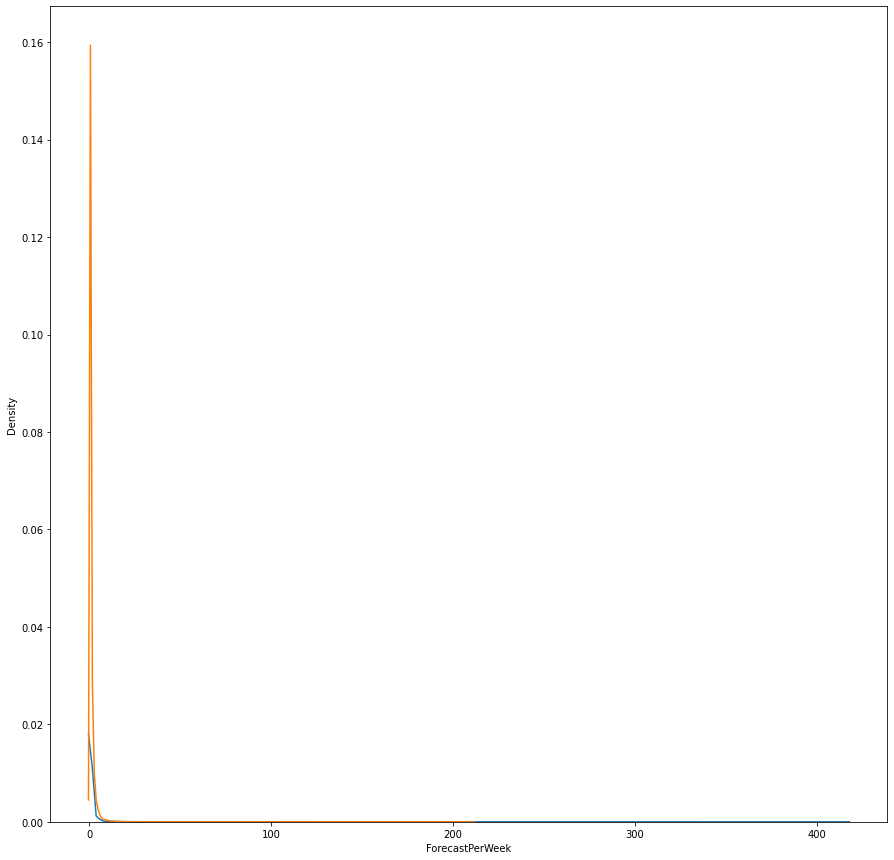

In [ ]:
plt.figure(figsize=(15,15))
sns.kdeplot(data[data['DiscontinuedTF'] == True]['ForecastPerWeek'], label='Discontinued')
sns.kdeplot(data[data['DiscontinuedTF'] == False]['ForecastPerWeek'], label='Continued')
plt.show()

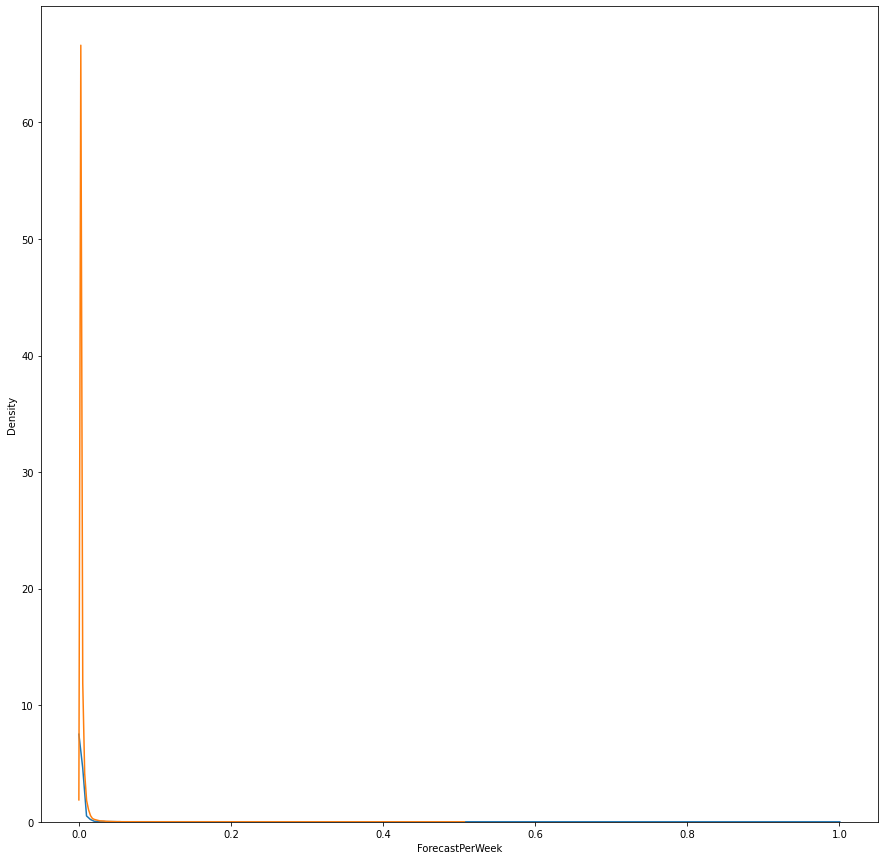

In [ ]:
plt.figure(figsize=(15,15))
sns.kdeplot(data[data['DiscontinuedTF'] == True]['ForecastPerWeek'], label='Discontinued')
sns.kdeplot(data[data['DiscontinuedTF'] == False]['ForecastPerWeek'], label='Continued')
plt.show()

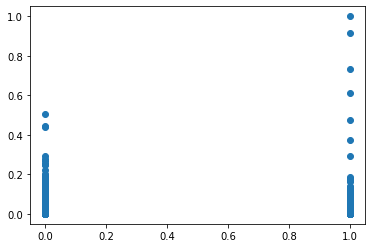

In [ ]:
plt.scatter(data['DiscontinuedTF'],data['ForecastPerWeek'])

In [ ]:
data.columns

Index(['CatEdition', 'SpringSummer', 'ProductKey', 'WeeksOut', 'Status',
       'SalePriceIncVAT', 'ForecastPerWeek', 'ActualsPerWeek',
       'DiscontinuedTF'],
      dtype='object')

PAIRPLOT

In [ ]:
columns= ['SalePriceIncVAT','ForecastPerWeek', 'ActualsPerWeek','DiscontinuedTF' ]

data1 = data[columns]

In [ ]:
data1.head(3)

,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,0.008798,0.001530,0.005699,0
1,0.008798,0.001561,0.005601,0
2,0.008798,0.001259,0.005781,0


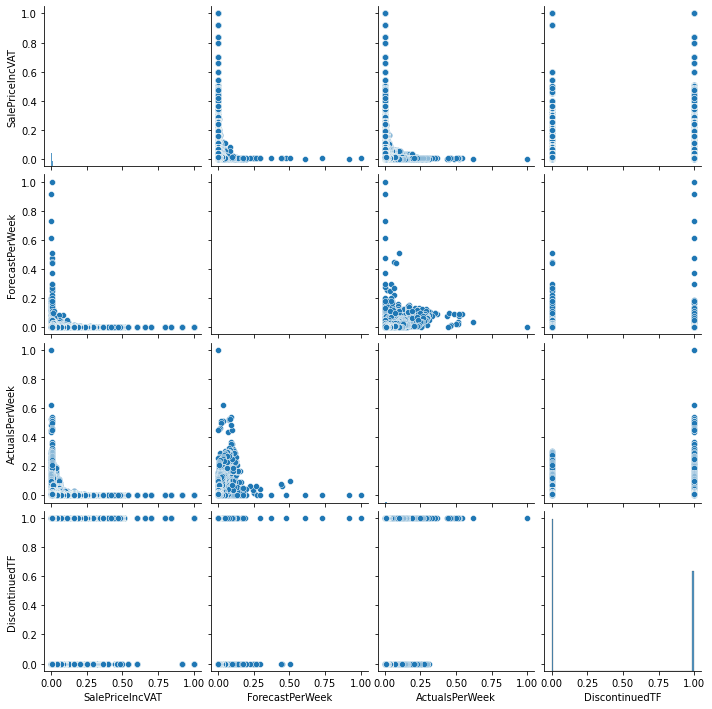

In [ ]:
sns.pairplot(data1)
plt.show()

In [ ]:
data2= data1.corr()

In [ ]:
data2

,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
SalePriceIncVAT,1.000000,-0.077100,-0.095941,0.087126
ForecastPerWeek,-0.077100,1.000000,0.639547,-0.105945
ActualsPerWeek,-0.095941,0.639547,1.000000,-0.140518
DiscontinuedTF,0.087126,-0.105945,-0.140518,1.000000


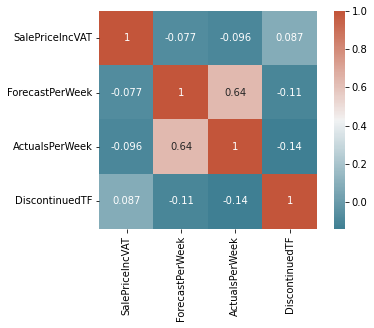

In [ ]:
sns.heatmap(data2, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True)
plt.show()

In [ ]:
columns=['SpringSummer','CatEdition','WeeksOut','ProductKey','Status','DiscontinuedTF']
data2= data[columns]
data2.head()

data2= data2.corr()
sns.heatmap(data2, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True)
plt.show()

NameError: ignored

In [ ]:
data.columns

Index(['CatEdition', 'SpringSummer', 'ProductKey', 'WeeksOut', 'Status',
       'SalePriceIncVAT', 'ForecastPerWeek', 'ActualsPerWeek',
       'DiscontinuedTF'],
      dtype='object')

In [ ]:
plt.figure(figsize=(15,15))
sns.kdeplot(data[data['DiscontinuedTF'] == True]['ForecastPerWeek'], label='Discontinued')
sns.kdeplot(data[data['DiscontinuedTF'] == False]['ForecastPerWeek'], label='Continued')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

## Without "Status"

In [ ]:
#X= data.drop(['DiscontinuedTF','Status'], axis=1)

In [ ]:
y=data['DiscontinuedTF']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)

In [ ]:
lg=LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6271478847989056

In [ ]:
#from sklearn.svm import SVC 

## With "Status" 

In [ ]:
X= data.drop('DiscontinuedTF', axis=1)
y=data['DiscontinuedTF']

In [ ]:
enc = LabelEncoder()
X['Status'] = enc.fit_transform(X['Status'])

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)

NameError: ignored

In [ ]:
#type(X['Status'].values)

In [ ]:
X.head()

In [ ]:
#X[X['Status']=='RI']

In [ ]:
#X['Status'] = X['Status'].astype(int)

In [ ]:
lg1=LogisticRegression()
lg1.fit(X_train, y_train)

In [ ]:
y_pred=lg1.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

## Using Various classification Algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
algo = {
          "DecisionTree Classifier" :               DecisionTreeClassifier(max_depth= 5),
          "RandomForest Classifier" :               RandomForestClassifier(n_estimators= 100),
         
          "XGBoost Classifier" :                    GradientBoostingClassifier(n_estimators=100)


}
acc=[]
f_imp=[]

In [ ]:
algo.items()

dict_items([('DecisionTree Classifier', DecisionTreeClassifier(max_depth=5)), ('RandomForest Classifier', RandomForestClassifier()), ('XGBoost Classifier', GradientBoostingClassifier())])

In [ ]:
for name, alg in algo.items():
  print("**********")
  print(name)
  print("**********")
  alg.fit(X_train, y_train)
  y_pred= alg.predict(X_test)
  acc= accuracy_score(y_pred, y_test)
  print("Accuracy_score : ", acc)
  #acc.append(acc)
  
  f_imp.append(alg.feature_importances_)
  print("Feature_importance : ", f_imp)


  

**********
DecisionTree Classifier
**********
Accuracy_score :  0.7459000568172416
Feature_importance :  [array([0.54500861, 0.        , 0.        , 0.        , 0.        ,
       0.02040112, 0.33445444, 0.10013583])]
**********
RandomForest Classifier
**********
Accuracy_score :  0.8784166193189654
Feature_importance :  [array([0.54500861, 0.        , 0.        , 0.        , 0.        ,
       0.02040112, 0.33445444, 0.10013583]), array([0.14626597, 0.00989659, 0.20470031, 0.05871769, 0.        ,
       0.14419902, 0.22275379, 0.21346664])]
**********
XGBoost Classifier
**********
Accuracy_score :  0.7523912887584605
Feature_importance :  [array([0.54500861, 0.        , 0.        , 0.        , 0.        ,
       0.02040112, 0.33445444, 0.10013583]), array([0.14626597, 0.00989659, 0.20470031, 0.05871769, 0.        ,
       0.14419902, 0.22275379, 0.21346664]), array([5.29092571e-01, 1.11141511e-03, 8.86509999e-05, 3.28578866e-03,
       0.00000000e+00, 3.23687962e-02, 2.68413568e-01, 1

In [ ]:
data.head(3)

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,89,True,8108,-11,RI,43.99,250.545,248.642,False
1,89,True,8108,-10,RI,43.99,255.700,244.333,False
2,89,True,8108,-9,RI,43.99,206.111,252.187,False


In [ ]:
rf= RandomForestClassifier(n_estimators= 200)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
accuracy_score(y_test, y_pred)  

0.9428435098713062

In [ ]:
rf= RandomForestClassifier(n_estimators= 300)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
accuracy_score(y_test, y_pred)  

0.9429993435677918

In [ ]:
data1= data[:10]

In [ ]:
data1

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,89,True,8108,-11,RI,43.99,250.545,248.642,False
1,89,True,8108,-10,RI,43.99,255.700,244.333,False
2,89,True,8108,-9,RI,43.99,206.111,252.187,False
3,89,True,8108,-8,RI,43.99,188.625,254.764,False
4,89,True,8108,-7,RI,43.99,169.142,249.000,False
5,89,True,8108,-6,RI,43.99,160.666,244.473,False
6,89,True,8108,-5,RI,43.99,138.200,251.750,False
7,89,True,8108,-4,RI,43.99,122.500,255.714,False
8,89,True,8108,-3,RI,43.99,89.333,249.727,False
9,89,True,8108,-2,RI,43.99,85.000,242.043,False
